# Reading Recorded Inputs

A class / module will eventually be released to handle the parsing / reading of the generated `input_recording.h5` when using `serpent record`. In the meantime, this notebook will demonstrate some common operations you might want to perform.

To use this notebook, you will need a HDF5 file that contains recorded game inputs.

In [1]:
import h5py

import io
import skimage.io

%matplotlib inline

In [21]:
file_path = "datasets/input_recording.h5"

## HDF5 File Structure

The prefix of the datasets for every seen game frame buffer during the recording corresponds to the timestamp of the second to last frame of that buffer.

Every game frame buffer will have 4 datasets:

* **[timestamp]-frames**: An array of PNG bytes for every game frame in the buffer
* **[timestamp]-keyboard-inputs**: An array of key-duration tuples that happened during that exact game frame buffer
* **[timestamp]-keyboard-inputs-active**: An array of keys that are still held down from a previous game frame buffer
* **[timestamp]-mouse-inputs**: An array of mouse event tuples
* **[timestamp]-reward**: A reward score, if a reward function was configured before recording

You can inspect the datasets of your HDF5 file like this:

In [22]:
with h5py.File(file_path, "r") as f:
    for key in f.keys():
        print(key)

1517520416.6113484-frames
1517520416.6113484-keyboard-inputs
1517520416.6113484-keyboard-inputs-active
1517520416.6113484-mouse-inputs
1517520416.6113484-reward
1517520416.7458675-frames
1517520416.7458675-keyboard-inputs
1517520416.7458675-keyboard-inputs-active
1517520416.7458675-mouse-inputs
1517520416.7458675-reward
1517520416.8115792-frames
1517520416.8115792-keyboard-inputs
1517520416.8115792-keyboard-inputs-active
1517520416.8115792-mouse-inputs
1517520416.8115792-reward
1517520416.8780997-frames
1517520416.8780997-keyboard-inputs
1517520416.8780997-keyboard-inputs-active
1517520416.8780997-mouse-inputs
1517520416.8780997-reward
1517520417.0301201-frames
1517520417.0301201-keyboard-inputs
1517520417.0301201-keyboard-inputs-active
1517520417.0301201-mouse-inputs
1517520417.0301201-reward
1517520417.102276-frames
1517520417.102276-keyboard-inputs
1517520417.102276-keyboard-inputs-active
1517520417.102276-mouse-inputs
1517520417.102276-reward
1517520417.1702573-frames
1517520417.17

1517520431.7938418-frames
1517520431.7938418-keyboard-inputs
1517520431.7938418-keyboard-inputs-active
1517520431.7938418-mouse-inputs
1517520431.7938418-reward
1517520431.8602958-frames
1517520431.8602958-keyboard-inputs
1517520431.8602958-keyboard-inputs-active
1517520431.8602958-mouse-inputs
1517520431.8602958-reward
1517520431.994571-frames
1517520431.994571-keyboard-inputs
1517520431.994571-keyboard-inputs-active
1517520431.994571-mouse-inputs
1517520431.994571-reward
1517520432.071296-frames
1517520432.071296-keyboard-inputs
1517520432.071296-keyboard-inputs-active
1517520432.071296-mouse-inputs
1517520432.071296-reward
1517520432.2044082-frames
1517520432.2044082-keyboard-inputs
1517520432.2044082-keyboard-inputs-active
1517520432.2044082-mouse-inputs
1517520432.2044082-reward
1517520432.2718008-frames
1517520432.2718008-keyboard-inputs
1517520432.2718008-keyboard-inputs-active
1517520432.2718008-mouse-inputs
1517520432.2718008-reward
1517520432.4051561-frames
1517520432.4051561

1517520464.1264255-keyboard-inputs
1517520464.1264255-keyboard-inputs-active
1517520464.1264255-mouse-inputs
1517520464.1264255-reward
1517520464.2758367-frames
1517520464.2758367-keyboard-inputs
1517520464.2758367-keyboard-inputs-active
1517520464.2758367-mouse-inputs
1517520464.2758367-reward
1517520464.3434143-frames
1517520464.3434143-keyboard-inputs
1517520464.3434143-keyboard-inputs-active
1517520464.3434143-mouse-inputs
1517520464.3434143-reward
1517520464.4829366-frames
1517520464.4829366-keyboard-inputs
1517520464.4829366-keyboard-inputs-active
1517520464.4829366-mouse-inputs
1517520464.4829366-reward
1517520464.5487404-frames
1517520464.5487404-keyboard-inputs
1517520464.5487404-keyboard-inputs-active
1517520464.5487404-mouse-inputs
1517520464.5487404-reward
1517520464.6814945-frames
1517520464.6814945-keyboard-inputs
1517520464.6814945-keyboard-inputs-active
1517520464.6814945-mouse-inputs
1517520464.6814945-reward
1517520464.7442048-frames
1517520464.7442048-keyboard-inputs

1517520495.013757-keyboard-inputs
1517520495.013757-keyboard-inputs-active
1517520495.013757-mouse-inputs
1517520495.013757-reward
1517520495.080464-frames
1517520495.080464-keyboard-inputs
1517520495.080464-keyboard-inputs-active
1517520495.080464-mouse-inputs
1517520495.080464-reward
1517520495.2145522-frames
1517520495.2145522-keyboard-inputs
1517520495.2145522-keyboard-inputs-active
1517520495.2145522-mouse-inputs
1517520495.2145522-reward
1517520495.2805798-frames
1517520495.2805798-keyboard-inputs
1517520495.2805798-keyboard-inputs-active
1517520495.2805798-mouse-inputs
1517520495.2805798-reward
1517520495.4261043-frames
1517520495.4261043-keyboard-inputs
1517520495.4261043-keyboard-inputs-active
1517520495.4261043-mouse-inputs
1517520495.4261043-reward
1517520495.5651422-frames
1517520495.5651422-keyboard-inputs
1517520495.5651422-keyboard-inputs-active
1517520495.5651422-mouse-inputs
1517520495.5651422-reward
1517520495.6301727-frames
1517520495.6301727-keyboard-inputs
15175204

1517520530.1860428-keyboard-inputs
1517520530.1860428-keyboard-inputs-active
1517520530.1860428-mouse-inputs
1517520530.1860428-reward
1517520530.3132477-frames
1517520530.3132477-keyboard-inputs
1517520530.3132477-keyboard-inputs-active
1517520530.3132477-mouse-inputs
1517520530.3132477-reward
1517520530.3815386-frames
1517520530.3815386-keyboard-inputs
1517520530.3815386-keyboard-inputs-active
1517520530.3815386-mouse-inputs
1517520530.3815386-reward
1517520530.511749-frames
1517520530.511749-keyboard-inputs
1517520530.511749-keyboard-inputs-active
1517520530.511749-mouse-inputs
1517520530.511749-reward
1517520530.5753832-frames
1517520530.5753832-keyboard-inputs
1517520530.5753832-keyboard-inputs-active
1517520530.5753832-mouse-inputs
1517520530.5753832-reward
1517520530.7107904-frames
1517520530.7107904-keyboard-inputs
1517520530.7107904-keyboard-inputs-active
1517520530.7107904-mouse-inputs
1517520530.7107904-reward
1517520530.784868-frames
1517520530.784868-keyboard-inputs
151752

1517520570.9619803-keyboard-inputs
1517520570.9619803-keyboard-inputs-active
1517520570.9619803-mouse-inputs
1517520570.9619803-reward
1517520571.0934577-frames
1517520571.0934577-keyboard-inputs
1517520571.0934577-keyboard-inputs-active
1517520571.0934577-mouse-inputs
1517520571.0934577-reward
1517520571.163953-frames
1517520571.163953-keyboard-inputs
1517520571.163953-keyboard-inputs-active
1517520571.163953-mouse-inputs
1517520571.163953-reward
1517520571.298568-frames
1517520571.298568-keyboard-inputs
1517520571.298568-keyboard-inputs-active
1517520571.298568-mouse-inputs
1517520571.298568-reward
1517520571.36543-frames
1517520571.36543-keyboard-inputs
1517520571.36543-keyboard-inputs-active
1517520571.36543-mouse-inputs
1517520571.36543-reward
1517520571.500397-frames
1517520571.500397-keyboard-inputs
1517520571.500397-keyboard-inputs-active
1517520571.500397-mouse-inputs
1517520571.500397-reward
1517520571.568019-frames
1517520571.568019-keyboard-inputs
1517520571.568019-keyboard

1517520610.0805354-keyboard-inputs
1517520610.0805354-keyboard-inputs-active
1517520610.0805354-mouse-inputs
1517520610.0805354-reward
1517520610.1476111-frames
1517520610.1476111-keyboard-inputs
1517520610.1476111-keyboard-inputs-active
1517520610.1476111-mouse-inputs
1517520610.1476111-reward
1517520610.2759092-frames
1517520610.2759092-keyboard-inputs
1517520610.2759092-keyboard-inputs-active
1517520610.2759092-mouse-inputs
1517520610.2759092-reward
1517520610.3403077-frames
1517520610.3403077-keyboard-inputs
1517520610.3403077-keyboard-inputs-active
1517520610.3403077-mouse-inputs
1517520610.3403077-reward
1517520610.4755054-frames
1517520610.4755054-keyboard-inputs
1517520610.4755054-keyboard-inputs-active
1517520610.4755054-mouse-inputs
1517520610.4755054-reward
1517520610.6164896-frames
1517520610.6164896-keyboard-inputs
1517520610.6164896-keyboard-inputs-active
1517520610.6164896-mouse-inputs
1517520610.6164896-reward
1517520610.684092-frames
1517520610.684092-keyboard-inputs
1

1517520648.0800633-reward
1517520648.1421494-frames
1517520648.1421494-keyboard-inputs
1517520648.1421494-keyboard-inputs-active
1517520648.1421494-mouse-inputs
1517520648.1421494-reward
1517520648.208996-frames
1517520648.208996-keyboard-inputs
1517520648.208996-keyboard-inputs-active
1517520648.208996-mouse-inputs
1517520648.208996-reward
1517520648.2885673-frames
1517520648.2885673-keyboard-inputs
1517520648.2885673-keyboard-inputs-active
1517520648.2885673-mouse-inputs
1517520648.2885673-reward
1517520648.424519-frames
1517520648.424519-keyboard-inputs
1517520648.424519-keyboard-inputs-active
1517520648.424519-mouse-inputs
1517520648.424519-reward
1517520648.5190809-frames
1517520648.5190809-keyboard-inputs
1517520648.5190809-keyboard-inputs-active
1517520648.5190809-mouse-inputs
1517520648.5190809-reward
1517520648.6653295-frames
1517520648.6653295-keyboard-inputs
1517520648.6653295-keyboard-inputs-active
1517520648.6653295-mouse-inputs
1517520648.6653295-reward
1517520648.73256-f

1517520688.1850972-keyboard-inputs-active
1517520688.1850972-mouse-inputs
1517520688.1850972-reward
1517520688.2509406-frames
1517520688.2509406-keyboard-inputs
1517520688.2509406-keyboard-inputs-active
1517520688.2509406-mouse-inputs
1517520688.2509406-reward
1517520688.3791325-frames
1517520688.3791325-keyboard-inputs
1517520688.3791325-keyboard-inputs-active
1517520688.3791325-mouse-inputs
1517520688.3791325-reward
1517520688.4430609-frames
1517520688.4430609-keyboard-inputs
1517520688.4430609-keyboard-inputs-active
1517520688.4430609-mouse-inputs
1517520688.4430609-reward
1517520688.5761278-frames
1517520688.5761278-keyboard-inputs
1517520688.5761278-keyboard-inputs-active
1517520688.5761278-mouse-inputs
1517520688.5761278-reward
1517520688.6444664-frames
1517520688.6444664-keyboard-inputs
1517520688.6444664-keyboard-inputs-active
1517520688.6444664-mouse-inputs
1517520688.6444664-reward
1517520688.7775576-frames
1517520688.7775576-keyboard-inputs
1517520688.7775576-keyboard-inputs

1517520724.1146321-frames
1517520724.1146321-keyboard-inputs
1517520724.1146321-keyboard-inputs-active
1517520724.1146321-mouse-inputs
1517520724.1146321-reward
1517520724.2470737-frames
1517520724.2470737-keyboard-inputs
1517520724.2470737-keyboard-inputs-active
1517520724.2470737-mouse-inputs
1517520724.2470737-reward
1517520724.3120952-frames
1517520724.3120952-keyboard-inputs
1517520724.3120952-keyboard-inputs-active
1517520724.3120952-mouse-inputs
1517520724.3120952-reward
1517520724.4499753-frames
1517520724.4499753-keyboard-inputs
1517520724.4499753-keyboard-inputs-active
1517520724.4499753-mouse-inputs
1517520724.4499753-reward
1517520724.5177343-frames
1517520724.5177343-keyboard-inputs
1517520724.5177343-keyboard-inputs-active
1517520724.5177343-mouse-inputs
1517520724.5177343-reward
1517520724.6535106-frames
1517520724.6535106-keyboard-inputs
1517520724.6535106-keyboard-inputs-active
1517520724.6535106-mouse-inputs
1517520724.6535106-reward
1517520724.7194905-frames
15175207

1517520758.9968302-reward
1517520759.131311-frames
1517520759.131311-keyboard-inputs
1517520759.131311-keyboard-inputs-active
1517520759.131311-mouse-inputs
1517520759.131311-reward
1517520759.1945586-frames
1517520759.1945586-keyboard-inputs
1517520759.1945586-keyboard-inputs-active
1517520759.1945586-mouse-inputs
1517520759.1945586-reward
1517520759.3255646-frames
1517520759.3255646-keyboard-inputs
1517520759.3255646-keyboard-inputs-active
1517520759.3255646-mouse-inputs
1517520759.3255646-reward
1517520759.3937016-frames
1517520759.3937016-keyboard-inputs
1517520759.3937016-keyboard-inputs-active
1517520759.3937016-mouse-inputs
1517520759.3937016-reward
1517520759.5247426-frames
1517520759.5247426-keyboard-inputs
1517520759.5247426-keyboard-inputs-active
1517520759.5247426-mouse-inputs
1517520759.5247426-reward
1517520759.592438-frames
1517520759.592438-keyboard-inputs
1517520759.592438-keyboard-inputs-active
1517520759.592438-mouse-inputs
1517520759.592438-reward
1517520759.72528-f

1517520798.6927283-frames
1517520798.6927283-keyboard-inputs
1517520798.6927283-keyboard-inputs-active
1517520798.6927283-mouse-inputs
1517520798.6927283-reward
1517520798.7725315-frames
1517520798.7725315-keyboard-inputs
1517520798.7725315-keyboard-inputs-active
1517520798.7725315-mouse-inputs
1517520798.7725315-reward
1517520798.9115915-frames
1517520798.9115915-keyboard-inputs
1517520798.9115915-keyboard-inputs-active
1517520798.9115915-mouse-inputs
1517520798.9115915-reward
1517520798.9806073-frames
1517520798.9806073-keyboard-inputs
1517520798.9806073-keyboard-inputs-active
1517520798.9806073-mouse-inputs
1517520798.9806073-reward
1517520799.0506766-frames
1517520799.0506766-keyboard-inputs
1517520799.0506766-keyboard-inputs-active
1517520799.0506766-mouse-inputs
1517520799.0506766-reward
1517520799.188761-frames
1517520799.188761-keyboard-inputs
1517520799.188761-keyboard-inputs-active
1517520799.188761-mouse-inputs
1517520799.188761-reward
1517520799.2578764-frames
1517520799.25

1517520841.9017062-reward
1517520841.9726434-frames
1517520841.9726434-keyboard-inputs
1517520841.9726434-keyboard-inputs-active
1517520841.9726434-mouse-inputs
1517520841.9726434-reward
1517520842.0404253-frames
1517520842.0404253-keyboard-inputs
1517520842.0404253-keyboard-inputs-active
1517520842.0404253-mouse-inputs
1517520842.0404253-reward
1517520842.177895-frames
1517520842.177895-keyboard-inputs
1517520842.177895-keyboard-inputs-active
1517520842.177895-mouse-inputs
1517520842.177895-reward
1517520842.2448862-frames
1517520842.2448862-keyboard-inputs
1517520842.2448862-keyboard-inputs-active
1517520842.2448862-mouse-inputs
1517520842.2448862-reward
1517520842.389114-frames
1517520842.389114-keyboard-inputs
1517520842.389114-keyboard-inputs-active
1517520842.389114-mouse-inputs
1517520842.389114-reward
1517520842.4586897-frames
1517520842.4586897-keyboard-inputs
1517520842.4586897-keyboard-inputs-active
1517520842.4586897-mouse-inputs
1517520842.4586897-reward
1517520842.5998101

1517520879.87949-mouse-inputs
1517520879.87949-reward
1517520879.94958-frames
1517520879.94958-keyboard-inputs
1517520879.94958-keyboard-inputs-active
1517520879.94958-mouse-inputs
1517520879.94958-reward
1517520880.0884213-frames
1517520880.0884213-keyboard-inputs
1517520880.0884213-keyboard-inputs-active
1517520880.0884213-mouse-inputs
1517520880.0884213-reward
1517520880.158581-frames
1517520880.158581-keyboard-inputs
1517520880.158581-keyboard-inputs-active
1517520880.158581-mouse-inputs
1517520880.158581-reward
1517520880.2337997-frames
1517520880.2337997-keyboard-inputs
1517520880.2337997-keyboard-inputs-active
1517520880.2337997-mouse-inputs
1517520880.2337997-reward
1517520880.365197-frames
1517520880.365197-keyboard-inputs
1517520880.365197-keyboard-inputs-active
1517520880.365197-mouse-inputs
1517520880.365197-reward
1517520880.4305642-frames
1517520880.4305642-keyboard-inputs
1517520880.4305642-keyboard-inputs-active
1517520880.4305642-mouse-inputs
1517520880.4305642-reward


1517520913.847188-reward
1517520913.9184308-frames
1517520913.9184308-keyboard-inputs
1517520913.9184308-keyboard-inputs-active
1517520913.9184308-mouse-inputs
1517520913.9184308-reward
1517520914.0489135-frames
1517520914.0489135-keyboard-inputs
1517520914.0489135-keyboard-inputs-active
1517520914.0489135-mouse-inputs
1517520914.0489135-reward
1517520914.1187687-frames
1517520914.1187687-keyboard-inputs
1517520914.1187687-keyboard-inputs-active
1517520914.1187687-mouse-inputs
1517520914.1187687-reward
1517520914.2500408-frames
1517520914.2500408-keyboard-inputs
1517520914.2500408-keyboard-inputs-active
1517520914.2500408-mouse-inputs
1517520914.2500408-reward
1517520914.3142147-frames
1517520914.3142147-keyboard-inputs
1517520914.3142147-keyboard-inputs-active
1517520914.3142147-mouse-inputs
1517520914.3142147-reward
1517520914.4480238-frames
1517520914.4480238-keyboard-inputs
1517520914.4480238-keyboard-inputs-active
1517520914.4480238-mouse-inputs
1517520914.4480238-reward
151752091

1517520942.636275-frames
1517520942.636275-keyboard-inputs
1517520942.636275-keyboard-inputs-active
1517520942.636275-mouse-inputs
1517520942.636275-reward
1517520942.7716901-frames
1517520942.7716901-keyboard-inputs
1517520942.7716901-keyboard-inputs-active
1517520942.7716901-mouse-inputs
1517520942.7716901-reward
1517520942.8414178-frames
1517520942.8414178-keyboard-inputs
1517520942.8414178-keyboard-inputs-active
1517520942.8414178-mouse-inputs
1517520942.8414178-reward
1517520942.9990497-frames
1517520942.9990497-keyboard-inputs
1517520942.9990497-keyboard-inputs-active
1517520942.9990497-mouse-inputs
1517520942.9990497-reward
1517520943.0763354-frames
1517520943.0763354-keyboard-inputs
1517520943.0763354-keyboard-inputs-active
1517520943.0763354-mouse-inputs
1517520943.0763354-reward
1517520943.212097-frames
1517520943.212097-keyboard-inputs
1517520943.212097-keyboard-inputs-active
1517520943.212097-mouse-inputs
1517520943.212097-reward
1517520943.2791588-frames
1517520943.2791588

1517520981.4622493-keyboard-inputs
1517520981.4622493-keyboard-inputs-active
1517520981.4622493-mouse-inputs
1517520981.4622493-reward
1517520981.6063862-frames
1517520981.6063862-keyboard-inputs
1517520981.6063862-keyboard-inputs-active
1517520981.6063862-mouse-inputs
1517520981.6063862-reward
1517520981.6771643-frames
1517520981.6771643-keyboard-inputs
1517520981.6771643-keyboard-inputs-active
1517520981.6771643-mouse-inputs
1517520981.6771643-reward
1517520981.8085394-frames
1517520981.8085394-keyboard-inputs
1517520981.8085394-keyboard-inputs-active
1517520981.8085394-mouse-inputs
1517520981.8085394-reward
1517520981.873858-frames
1517520981.873858-keyboard-inputs
1517520981.873858-keyboard-inputs-active
1517520981.873858-mouse-inputs
1517520981.873858-reward
1517520982.008525-frames
1517520982.008525-keyboard-inputs
1517520982.008525-keyboard-inputs-active
1517520982.008525-mouse-inputs
1517520982.008525-reward
1517520982.076958-frames
1517520982.076958-keyboard-inputs
1517520982.

1517521019.066275-keyboard-inputs
1517521019.066275-keyboard-inputs-active
1517521019.066275-mouse-inputs
1517521019.066275-reward
1517521019.135357-frames
1517521019.135357-keyboard-inputs
1517521019.135357-keyboard-inputs-active
1517521019.135357-mouse-inputs
1517521019.135357-reward
1517521019.266898-frames
1517521019.266898-keyboard-inputs
1517521019.266898-keyboard-inputs-active
1517521019.266898-mouse-inputs
1517521019.266898-reward
1517521019.3440342-frames
1517521019.3440342-keyboard-inputs
1517521019.3440342-keyboard-inputs-active
1517521019.3440342-mouse-inputs
1517521019.3440342-reward
1517521019.4123285-frames
1517521019.4123285-keyboard-inputs
1517521019.4123285-keyboard-inputs-active
1517521019.4123285-mouse-inputs
1517521019.4123285-reward
1517521019.5459492-frames
1517521019.5459492-keyboard-inputs
1517521019.5459492-keyboard-inputs-active
1517521019.5459492-mouse-inputs
1517521019.5459492-reward
1517521019.6107416-frames
1517521019.6107416-keyboard-inputs
1517521019.61

### Inspecting Game Buffer Frames

/home/serpent/.pyenv/versions/3.6.0/envs/serpent/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


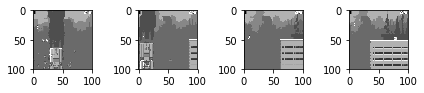

In [24]:
prefix = "1517520748.6461143"

with h5py.File(file_path, "r") as f:
    game_buffer_frames = [skimage.io.imread(io.BytesIO(b)) for b in f[f"{prefix}-frames"].value]
    
skimage.io.imshow_collection(game_buffer_frames)

/home/serpent/.pyenv/versions/3.6.0/envs/serpent/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


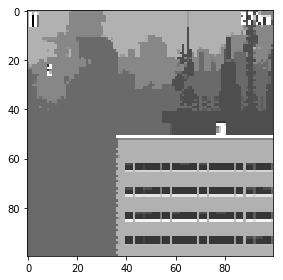

In [25]:
skimage.io.imshow(game_buffer_frames[3])

### Inspecting Inputs

In [28]:
with h5py.File(file_path, "r") as f:
    for key in f.keys():
        if key.endswith("keyboard-inputs"):  # or keyboard-inputs-active / mouse-inputs
            inputs = f[key].value
            
            if len(inputs):
                print(inputs)

[[b'KEY_SPACE' b'0.47920703887939453']]
[[b'KEY_SPACE' b'0.5917832851409912']]
[[b'KEY_SPACE' b'0.22465038299560547']]
[[b'KEY_SPACE' b'0.0384068489074707']]
[[b'KEY_RETURN' b'0.1519482135772705']]
[[b'KEY_SPACE' b'0.46372175216674805']]
[[b'KEY_SPACE' b'0.23189783096313477']]
[[b'KEY_SPACE' b'0.14378595352172852']]
[[b'KEY_SPACE' b'0.19989252090454102']]
[[b'KEY_SPACE' b'0.4409191608428955']]
[[b'KEY_SPACE' b'0.21587657928466797']]
[[b'KEY_SPACE' b'0.48714303970336914']]
[[b'KEY_SPACE' b'0.8478207588195801']]
[[b'KEY_SPACE' b'0.7599649429321289']]
[[b'KEY_SPACE' b'0.5757839679718018']]
[[b'KEY_SPACE' b'0.1679995059967041']]
[[b'KEY_SPACE' b'0.17424631118774414']]
[[b'KEY_SPACE' b'0.10251021385192871']]
[[b'KEY_SPACE' b'0.09599971771240234']]
[[b'KEY_SPACE' b'0.20787739753723145']]
[[b'KEY_RETURN' b'0.13419532775878906']]
[[b'KEY_SPACE' b'0.1758558750152588']]
[[b'KEY_SPACE' b'0.16944193840026855']]
[[b'KEY_SPACE' b'0.14394593238830566']]
[[b'KEY_SPACE' b'0.11806464195251465']]
[[b'KEY